## Natural Language Processing (NLP) with TensorFlow

Natural Language Processing (NLP) is a field of artificial intelligence (AI) that focuses on enabling computers to understand, interpret, generate, and respond to human language in a way that is both meaningful and useful.

### 🧠 In Simple Terms:
NLP is how we teach computers to read, write, and understand human language—whether that's spoken or written. It bridges the gap between how humans naturally communicate and how computers process information.

### 🔍 Key Goals of NLP:

- Understanding language (e.g., “What is the meaning of this sentence?”)

- Generating language (e.g., chatbots or translation tools)

- Classifying text (e.g., spam detection)

- Extracting information (e.g., pulling names or dates from documents)

- Conversational AI (e.g., Siri, Alexa, ChatGPT)

### 🛠️ Examples of NLP in Action:

- Google Translate: Translates text between languages.

- Spam Filters: Detect spam based on words and phrases.

- Chatbots: Understand and respond to customer questions.

- Sentiment Analysis: Determines whether a sentence expresses a positive or negative opinion.

- Search Engines: Interpret what users really mean by their queries.

### 🔗 Relation to AI and ML:

NLP often combines linguistics (rules of language) with machine learning (learning from data) so that systems can improve over time with more examples.

As you may already know, for production-level deep learning or model training on large datasets, having a GPU (or using cloud services with GPUs) is much more efficient. So let us firstly learn about the specifications of the GPU we have at our disposal.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**IMPORTANT NOTE!** \\
Firstly do not execute the line below, however, keep in mind that you may need to return here and run it in order to avoid keras layer incompatibilities and corresponding issues. Please note that after running this specific cell, you should restart the session to have all installments take affect. Finaly you can re-run all cell and enjoy the outcome.

In [2]:
# !pip install -q -U tensorflow==2.15.0 tensorflow-hub keras==2.15.0

The next step would be getting the helper functions created and developed by **Daniel Bourke** which have frequently been used in his own tutorials - Click [here](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) to open `helper_functions.py` on his github.

P.E.: This notebook is kind of inspired by his work just like many others. So I would like to send him all my gratitude for the great he has done. To learn more about his tutorials, visit [Zero to Mastery (ZTM)](https://zerotomastery.io/).

In [3]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-05-12 19:15:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-05-12 19:15:00 (17.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [4]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

Oh! What about data?

Well, let us also download a dataset from Kaggle. You can read about the specifications of the dataset at [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started/data).

In [5]:
# Download dataset
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2025-05-12 19:15:16--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2025-05-12 19:15:16 (38.5 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [6]:
# Visualize data

import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Shuffle train frame
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


The model we are going to train on the above dataset is expected to resolve the problem of classifying whether a Tweet is about a disaster or not.

In [8]:
# Extract the number of samples in each class
# This can help us understand how well the dataset is balanced
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [9]:
import random

random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
@sonofbobBOB @Shimmyfab @trickxie usually I'd agree. Once the whole chopping heads off throwing gays off rooftops &amp; suicide bombing start

---

Target: 0 (not real disaster)
Text:
All these people explode ????

---

Target: 1 (real disaster)
Text:
Officials rescue 367 migrants off Libya; 25 bodies found - Fox News http://t.co/cEdCUgEuWs #News

---

Target: 0 (not real disaster)
Text:
@panic awesome thanks.

---

Target: 1 (real disaster)
Text:
Apparently part of the building just collapsed. Hope everyone is ok.

---



**NOTE!** When creating a random index, the top of the range is subtracted by 5 (`len(train_df)-5`) because the code following this line is accessing the next 5 rows starting at `random_index`. Subtracting 5 ensures that the selected index plus 4 more steps won't go out of bounds.

Now let's split our data...

In [10]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

**NOTE!** Using `.to_numpy()` converts a DataFrame to a NumPy array, which is often required by machine learning models (like in scikit-learn) that expect input as arrays, not pandas objects. It also improves performance slightly during training.

Before feeding an NLP model with textual data, there are a series of preprocessing steps typically performed to clean, structure, and convert the text into a model-friendly format.

### tf.keras.layers.TextVectorization

`tf.keras.layers.TextVectorization` is a built-in TensorFlow Keras preprocessing layer used to convert raw text into numeric tensors—a crucial step before feeding text into neural networks.

#### 🔍 What It Does
The TextVectorization layer automates text standardization, tokenization, and vectorization, enabling a full text preprocessing pipeline inside the model.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000
max_length = 15

# Other than the two values for max_tokens and output_sequence_length, the rest are default
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=max_length) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

### text_vectorizer.adapt()

#### 🔍 What it does:
This step builds the vocabulary from your dataset (texts). Think of it like training the TextVectorization layer to understand what words exist in your data and how to index them.

🧠 Internally:
- It standardizes the text (e.g., lowercases, removes punctuation, etc.).
- Then it tokenizes the text into words (or characters, based on config).
- Finally, it counts the frequency of tokens and keeps the most frequent `max_tokens` - further explanation will be given a bit later.

In [12]:
# Map TextVectorization instance text_vectorizer to data
# In other words, fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

### vectorized_text = text_vectorizer(texts)
#### 🔍 What it does:
This converts your raw text into a sequence of integers, where each word is replaced by its corresponding index from the vocabulary built during `adapt()`.

#### 🧠 Internally:
- Each text string is standardized and tokenized the same way as during `adapt()`.
- Each token is replaced with its index (from the learned vocab).
- If `output_sequence_length` is set, the sequences are padded/truncated to that length.

| Step                      | Purpose                          | Outcome                        |
|---------------------------|-----------------------------------|--------------------------------|
| `text_vectorizer.adapt()`            | Learn vocabulary from data        | Builds word → index mapping   |
| `text_vectorizer(texts)`       | Vectorize text using vocab        | Converts text to integer sequences |


In [13]:
# Create a random sample sentence and tokenize it
sample_sentence = "There is a flood in my street!"
vectorized_text = text_vectorizer([sample_sentence])
vectorized_text

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

**NOTE!** Keep in mind that the vocabulary size of a certain text vectorizer (`text_vectorizer()` in this case) is determined by the number of distinct words present in the train data (`train_sentences` in this case) which is learned during adaptation (`text_vectorizer.adapt(train_sentences)`).

In [14]:
# 10 out of all words present in train data
text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [15]:
longer_sample_sentence = "Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set."
longer_vectorized_text = text_vectorizer([longer_sample_sentence])
longer_vectorized_text

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 216,    2, 1246,  284,   41,   40,    1,    7,   46,  162,    3,
         147,    5,    1,  103]])>

It is clearly noticeable that a longer sentence as in `longer_vectorized_text` has resulted in different values but the same sequence length (15) since `output_sequence_length=max_length=15` which is the average number of tokens per Tweet in the training set.

**NOTE!** Please note the 0's at the end of the returned tensor, which is because of setting `output_sequence_length=15`, that is, no matter the size of the sequence we pass to `text_vectorizer`, it always returns a sequence with a length of 15.

In [16]:
# Find average number of tokens (words) in training Tweets
avg_no_tokens = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
avg_no_tokens

15

Also, as explained by Daniel himself...

"For `max_tokens` (the number of words in the vocabulary), multiples of 10,000 (10,000, 20,000, 30,000) or the exact number of unique words in your text (e.g. 32,179) are common values."

However, in TensorFlow documentation the explanation below is given on `max_tokens`:

"Maximum size of the vocabulary for this layer. This should only be specified when adapting a vocabulary or when setting `pad_to_max_tokens=True`. Note that this vocabulary contains 1 OOV token, so the effective number of tokens is (`max_tokens - 1 - (1 if output_mode == "int" else 0)`)."

Let us try it also with some random sentences...

In [17]:
# Set seed to produce the same result/sentence
# You can comment the line below to produce different random results/sentences
seed = random.seed(42)

random_sentence = random.choice(train_sentences)
print(f"Original Sentence: {random_sentence}")
random_sentence
print(f"Vectorized Sentence: {text_vectorizer([random_sentence])}")

Original Sentence: You are listening to LLEGASTE TU - TWISTER EL REY
Vectorized Sentence: [[  12   22 1820    5    1 7321  358 1684 4739    0    0    0    0    0
     0]]


There is also another method which returns the current vocabulary of the layer:

In [18]:
# Get the unique words in the vocabulary
words = text_vectorizer.get_vocabulary()
top_3_words = words[:3]
top_3_words

['', '[UNK]', 'the']

In [19]:
# Get vocab size
vocab_size = text_vectorizer.vocabulary_size()
print(vocab_size)

# text_vectorizer.vocabulary_size() vs. len(text_vectorizer.get_vocabulary())
vocab_size == len(words)

10000


True

### Create an Embedding Using an Embedding Layer

`tf.keras.layers.Embedding` is a key layer used in NLP models after vectorizing text, and it plays a crucial role in teaching the model how to understand words numerically.

#### What is `tf.keras.layers.Embedding`?
It’s a lookup table that maps each word (represented by an integer index) to a dense vector of fixed size. If you're using the Embedding layer as part of a trainable model and you haven't trained it yet, here's what happens:

🚧 Before Training:

- The Embedding layer assigns random vectors to each word index.
- These vectors have no semantic meaning yet.
- So, when you pass in a sentence like "I love pizza":

  - It's tokenized and mapped to integers (e.g., `[12, 85, 210]`)
  - Each integer gets a random embedding vector (e.g., shape `(3, 128)` if `output_dim=128`)
  - These vectors are not meaningful yet — just initial placeholders. In fact, they are learned during training to capture semantic meaning.

🧠 During Training:

- The embedding vectors are updated via backpropagation.
- The model learns to adjust these vectors so that:
  - Words with similar contexts get closer in vector space.
  - Semantic relationships start to emerge (e.g., "king" and "queen" become related).

✅ After Training:

- The embeddings now encode semantics and syntax.
- They can be visualized, analyzed, or reused in other models.

In [20]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [21]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
rnd_sentence_embedding = embedding(text_vectorizer([random_sentence]))
rnd_sentence_embedding

Original text:
The cryptic words that guided pilots on the Hiroshima bombing mission http://t.co/FCe0K1Ihti      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02149647, -0.02937633,  0.00342622, ..., -0.00879005,
         -0.04194181, -0.04818932],
        [ 0.03033764, -0.03137288,  0.03979082, ..., -0.00300504,
         -0.03248589, -0.00583199],
        [ 0.03978116,  0.03836597,  0.01918827, ..., -0.02279679,
          0.04335965, -0.00362466],
        ...,
        [ 0.03428488, -0.00230921, -0.01177281, ..., -0.00837744,
          0.02710113,  0.02781477],
        [ 0.03428488, -0.00230921, -0.01177281, ..., -0.00837744,
          0.02710113,  0.02781477],
        [ 0.03428488, -0.00230921, -0.01177281, ..., -0.00837744,
          0.02710113,  0.02781477]]], dtype=float32)>

Let's have a look at a single token's embedding...

In [22]:
# Check out a single token's embedding
rnd_sentence_embedding[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02149647, -0.02937633,  0.00342622, -0.04875937,  0.01049016,
       -0.0016209 ,  0.01262898, -0.02825054, -0.01185179,  0.02357045,
       -0.02679315,  0.03386286, -0.0406562 , -0.04717294,  0.00756089,
       -0.02818035, -0.00385709,  0.04560195, -0.04534809, -0.01251936,
        0.03380794, -0.01760418,  0.02386892, -0.0202601 ,  0.01390995,
       -0.00929542,  0.02087094, -0.00366124,  0.00596233, -0.03519595,
        0.04493082,  0.03867403,  0.04164764, -0.01133325, -0.01300217,
        0.01502884,  0.01238938, -0.02950954, -0.04531053,  0.01939373,
        0.04747811,  0.02187475, -0.03974015,  0.03498482,  0.0472417 ,
       -0.01039379,  0.02388047,  0.03469309,  0.01214756, -0.00050084,
        0.03851438, -0.03839665, -0.04137223, -0.00572108,  0.03308627,
        0.0125089 ,  0.01831282,  0.00337977,  0.03702444, -0.03393061,
        0.04728509, -0.00533633,  0.03613198, -0.00791448,  0.01165885,
        0.030528

Summary:

| Stage            | Meaning Captured? | Description                               |
|------------------|-------------------|-------------------------------------------|
| Before Training  | ❌ No              | Random vectors; no understanding          |
| During Training  | ⚙️ Gradual        | Vectors updated to reflect meaning        |
| After Training   | ✅ Yes            | Embeddings reflect word semantics         |


### Modelling
Having said all the long but sweet tale above, seems like the stage is set to buld our models. Conventionally, we will start with a baseline and then experimenting with other alternatives, we will try to improve performance based on the the results achieved.

More specifically, we'll be building the following:

- **Model 0**: Naive Bayes (baseline)
- **Model 1**: Feed-forward neural network (dense model)
- **Model 2**: LSTM model
- **Model 3**: GRU model
- **Model 4**: Bidirectional-LSTM model
- **Model 5**: 1D Convolutional Neural Network
- **Model 6**: TensorFlow Hub Pretrained Feature Extractor
- Model 7: Same as model 6 with 10% of training data

#### Model 1: Dense Model


A **baseline** in machine learning is a simple model or method used as a point of comparison for more complex models. It might be as basic as predicting the most frequent class (in classification) or the mean value (in regression). A **benchmark** refers to the standard performance level—often set by the baseline or an existing best model—against which new models are evaluated.

In short, baselines provide simple starting points to evaluate whether a more advanced model is truly learning something meaningful.

The combination of actions we take below is widely used as a lightweight, interpretable baseline for tasks like spam detection, sentiment analysis, and topic classification.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create pipeline
model0 = Pipeline([
    ("tfid", TfidfVectorizer()),    # convert word to numerical representations
    ("classifier", MultinomialNB()) # model the converted data
])

In [24]:
# Fit themodel
model0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('classifier', MultinomialNB())])

So when the model is fit, it actually learns about whether an e-mail for instance is *Spam* or *Ham* based on the frequency of word accurances (word count) collectively.

For example, after fitting:

- The model knows "buy" and "now" are common in class 1 (spam).
- "hello" and "friend" are seen in class 0 (not spam).
- It can now classify new texts like "buy friend" based on learned probabilities.

In [25]:
# Evaluate model
score_baseline = model0.score(val_sentences, val_labels)
print(f"Outcome: The baseline model achieves an accuracy of {score_baseline*100:.2f}%.")

Outcome: The baseline model achieves an accuracy of 79.27%.


In [26]:
# Make prediction
model0.predict(val_sentences[:5])

array([1, 1, 1, 0, 0])

In [27]:
# Get baseline predictions
baseline_preds = model0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Create Evaluation Function

In [28]:
# Define function to evaluate accuracy, precision, recall, fscore

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_results(y_true: list, y_pred: list) -> dict:
  """
  Computes model accuracy, precision, recall and f1-score of a binary classification mode

  Args:
  ----
  y_true (list): list of true labels
  y_pred (ilst): list of predicted labels

  Returns a dictionary of precision, recall, f1-score and accuracy
  """

  # Compute model accuracy
  accuracy = accuracy_score(y_true, y_pred) * 100

  # Compute model precision, recall and f1-score using "weighted" average
  precision, recall, f1score, _ = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average="weighted")
  results = {"accuracy": accuracy,
             "precision": precision,
             "recall": recall,
             "f1score": f1score}

  return results

**NOTE!** The term *weighted average* means that when combining the precision, recall, and F1-score values across different classes, each class contributes to the final score proportionally to its support — i.e., the number of true instances for that class in the dataset.

In [29]:
# Produce baseline results
baseline_results = compute_results(y_true=val_labels, y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1score': 0.7862189758049549}

To keep track of the results achieved by different models and configurations, which are mainly based TensorFlow framework, it would be wise to use `tf.keras.callbacks.TensorBoard()` and create a tensorboard callback.

In [30]:
from datetime import datetime


def create_tb_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
  -----
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)

  Returns a TensorBoard callback.
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tb_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tb_callback

In [31]:
# Directory to Save logs
SAVE_DIR = "model_logs"

#### Model 1: Dense Model

In [32]:
# Build model with the Functional API

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional since they're raw strings

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x) # [Optional] lower the dimensionality of the embedding (try running the model without this layer and see what happens)

# Create the output layer
outputs = layers.Dense(1, activation="sigmoid")(x) # want binary outputs so use sigmoid activation

# Construct the model
model1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [33]:
# Compile model
model1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [34]:
model1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

Now that our model is compiled, let us fit it to our training data for a few epochs...

In [35]:
callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                             experiment_name="simple_dense_model")]

model1_history = model1.fit(
    train_sentences,
    train_labels,
    epochs=6,
    validation_data=(val_sentences, val_labels),
    callbacks=callbacks
)

Saving TensorBoard log files to: model_logs/simple_dense_model/20250512-191520
Epoch 1/6
215/215 [==============================] - 10s 37ms/step - loss: 0.6089 - accuracy: 0.7002 - val_loss: 0.5356 - val_accuracy: 0.7572
Epoch 2/6
215/215 [==============================] - 4s 19ms/step - loss: 0.4406 - accuracy: 0.8193 - val_loss: 0.4690 - val_accuracy: 0.7887
Epoch 3/6
215/215 [==============================] - 4s 20ms/step - loss: 0.3459 - accuracy: 0.8612 - val_loss: 0.4590 - val_accuracy: 0.7927
Epoch 4/6
215/215 [==============================] - 5s 24ms/step - loss: 0.2845 - accuracy: 0.8915 - val_loss: 0.4645 - val_accuracy: 0.7887
Epoch 5/6
215/215 [==============================] - 4s 20ms/step - loss: 0.2376 - accuracy: 0.9127 - val_loss: 0.4772 - val_accuracy: 0.7861
Epoch 6/6
215/215 [==============================] - 4s 20ms/step - loss: 0.2015 - accuracy: 0.9285 - val_loss: 0.5003 - val_accuracy: 0.7848


In [36]:
# Check the results
model1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7848


[0.5003155469894409, 0.7847769260406494]

In [37]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01675929, -0.01866265, -0.01172006, ...,  0.00767409,
          0.04422944,  0.0468277 ],
        [-0.03171993, -0.05382708,  0.0260134 , ..., -0.04385087,
         -0.03489233, -0.00707702],
        [-0.02946997, -0.03839888, -0.00826059, ...,  0.00028563,
         -0.03272296, -0.03984141],
        ...,
        [-0.03674648,  0.03967234, -0.02804722, ..., -0.03340916,
         -0.02385895,  0.0039628 ],
        [-0.03436453, -0.0385634 , -0.06618966, ...,  0.06185308,
          0.04328023, -0.00472206],
        [-0.05327442, -0.05338037, -0.0960642 , ...,  0.07603045,
          0.10914066,  0.07501896]], dtype=float32)>]

In [38]:
embedding_weights = model1.get_layer("embedding_1").get_weights()[0]
embedding_weights, embedding_weights.shape

(array([[ 0.01675929, -0.01866265, -0.01172006, ...,  0.00767409,
          0.04422944,  0.0468277 ],
        [-0.03171993, -0.05382708,  0.0260134 , ..., -0.04385087,
         -0.03489233, -0.00707702],
        [-0.02946997, -0.03839888, -0.00826059, ...,  0.00028563,
         -0.03272296, -0.03984141],
        ...,
        [-0.03674648,  0.03967234, -0.02804722, ..., -0.03340916,
         -0.02385895,  0.0039628 ],
        [-0.03436453, -0.0385634 , -0.06618966, ...,  0.06185308,
          0.04328023, -0.00472206],
        [-0.05327442, -0.05338037, -0.0960642 , ...,  0.07603045,
          0.10914066,  0.07501896]], dtype=float32),
 (10000, 128))

In [39]:
# Make predictions in the form of probabilities
model1_pred_probs = model1.predict(val_sentences)
model1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.40704438],
       [0.747801  ],
       [0.9986084 ],
       [0.07432393],
       [0.06996122],
       [0.9569832 ],
       [0.9307086 ],
       [0.9969457 ],
       [0.98479366],
       [0.27558458]], dtype=float32)

In [40]:
model1_pred_probs[:10].round()  # round up/down

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [41]:
# model1_preds = tf.squeeze(model1_pred_probs.round())

# OR alternatively
model1_preds = model1_pred_probs.round().squeeze()

model1_preds[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)

Now that the predictions are produced in the form of 0/1 values (binary classification), we can compare them to the ground truth values and produce results for different metrics.

In [42]:
# Compute model_1 metrics
model1_results = compute_results(y_true=val_labels,
                                 y_pred=model1_preds)
model1_results

{'accuracy': 78.4776902887139,
 'precision': 0.7880247798695493,
 'recall': 0.7847769028871391,
 'f1score': 0.7823139263800303}

Let us compare the results achieved by the two models so far...

In [43]:
import numpy as np
np.array(list(model1_results.values())) >= np.array(list(baseline_results.values()))

array([False, False, False, False])

In [44]:
def compare_models(model1_res, model2_res):
  comp_res = np.array(list(model1_res.values())) >= np.array(list(model2_res.values()))
  for key, value in model1_res.items():
    print(f"Baseline {key}: {value:.2f}, New Model {key}: {model2_res[key]:.2f}, Difference: {model2_res[key] - value:.2f}")

compare_models(baseline_results, model1_results)

Baseline accuracy: 79.27, New Model accuracy: 78.48, Difference: -0.79
Baseline precision: 0.81, New Model precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New Model recall: 0.78, Difference: -0.01
Baseline f1score: 0.79, New Model f1score: 0.78, Difference: -0.00


The first model (`model1`) contained an embedding layer (`embedding`) which learned a way of representing words as feature vectors by passing over the training data.

### Visualize Embeddings
Let us now visualize the embedding our model has learned.

But first let me ask you a question...

**Question:** Have you ever thought to yourself what the differences between the embedding learned during training and the embedding model we use to transform texts and words into their numerical representations e.g., RAG systems?

**Answer:** The former ones are task-specific embeddings that are learned as part of training a deep learning model — such as a classifier or a language model — produced by backpropagation during supervised training while the latter ones are precomputed semantic embeddings used to represent chunks of documents, questions, or passages generated by pretrained embedding models like:

- OpenAI's text-embedding-ada-002
- Hugging Face's sentence-transformers
- BERT-based encoders

To visualize our embedding using the **[TensorFlow Embedding Projector Tool](http://projector.tensorflow.org/)**, we will need two objects/files:
- The embedding vectors (same as embedding weights).
- The meta data of the embedding vectors (the words they represent - our vocabulary).

In [45]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words):
#   if num == 0:
#      continue # skip padding token
#   vec = embedding_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")


Once you have downloaded the embedding vectors and metadata, you can visualize them using **Embedding Vector Tool**:

1. Go to http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files you downloaded (`embedding_vectors.tsv` and `embedding_metadata.tsv`)
4. Explore
5. Optional: You can share the data you've created by clicking "Publish"

### Recurrent Neural Networks (RNN's)

For our next series of modelling experiments we're going to be using a special kind of neural network called a **Recurrent Neural Network (RNN)**. Recurrent Neural Networks (RNNs) are a type of neural network architecture designed for sequence data. Unlike traditional feedforward networks, RNNs have a memory of previous inputs, which allows them to process data where context or order matters — such as time series, text, or speech.

In other words, RNNs process one element of a sequence at a time and maintain a hidden state that gets updated at each step. This hidden state acts like memory, carrying information from previous inputs forward to influence future predictions.

Recurrent neural networks can be used for a number of sequence-based problems:

- **One to one:** one input, one output, such as image classification.
- **One to many:** one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
- **Many to one:** many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
- **Many to many:** many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output) - taken from [Zero to Mastery TensorFlow for Deep Learning](https://dev.mrdbourke.com/tensorflow-deep-learning/08_introduction_to_nlp_in_tensorflow/).

#### Challenges:

- Vanishing/exploding gradient problems for long sequences.
- Limited long-term memory (this led to variants like LSTM and GRU).
  - Long short-term memory cells (LSTMs).
  - Gated recurrent units (GRUs).
  - Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).

#### Use Cases:

- Language modeling
- Time series prediction
- Speech recognition
- Machine translation (as part of encoder-decoder models)

#### Model 2: LSTM

The main difference comparing to the previous model is that we will add an LSTM layer between the embedding layer and the output. Even though the previous trained embeddings will not be reused but replaced with a new one, the text vectorizer can be reused as it won't update during training.

In [46]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                    output_dim=128,
                                    embeddings_initializer="uniform",
                                    input_length=max_length,
                                    name="embedding_2")

In [47]:
# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence (only the last output from the final time step).
                       # use when you only need the summary of the input sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [48]:
# Compile model
model2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:
model2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

Formula to compute the number of params:
```
params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
```
Or covering with NN concepts and terminology:
```
num_params = [(num_units + input_dim + 1) * num_units] * 4
```

In [50]:
# Fit model
model2_history = model2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20250512-191604
Epoch 1/5
215/215 [==============================] - 11s 35ms/step - loss: 0.5125 - accuracy: 0.7430 - val_loss: 0.4575 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 9s 42ms/step - loss: 0.3160 - accuracy: 0.8718 - val_loss: 0.5103 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 8s 35ms/step - loss: 0.2166 - accuracy: 0.9175 - val_loss: 0.5949 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1495 - accuracy: 0.9483 - val_loss: 0.6486 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.1038 - accuracy: 0.9634 - val_loss: 0.8199 - val_accuracy: 0.7612


In [51]:
# Make predictions on test/validation
model2_pred_probs = model2.predict(val_sentences)
model2_pred_probs.shape, model2_pred_probs[:10] # view the first 10

24/24 [==============================] - 1s 6ms/step


((762, 1),
 array([[0.01214359],
        [0.7536886 ],
        [0.999332  ],
        [0.12561704],
        [0.00793038],
        [0.9996916 ],
        [0.857947  ],
        [0.99984264],
        [0.9997174 ],
        [0.20223187]], dtype=float32))

In [52]:
# Turn prediction probabilities into prediction classes
model2_preds = tf.squeeze(tf.round(model2_pred_probs))
model2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [53]:
# Model 2 Resuls
model2_results = compute_results(y_true=val_labels, y_pred=model2_preds)
model2_results

{'accuracy': 76.11548556430446,
 'precision': 0.7618883943071393,
 'recall': 0.7611548556430446,
 'f1score': 0.7593763358258424}

Alright! We all remember that the first dense model could not excel in performance compared to the baseline. Now let us compare the baseline model with this new one in order to understand whether a better performance is achieved or not...

In [54]:
# Comparison: model 1 vs. model 2
compare_models(model1_results, model2_results)

Baseline accuracy: 78.48, New Model accuracy: 76.12, Difference: -2.36
Baseline precision: 0.79, New Model precision: 0.76, Difference: -0.03
Baseline recall: 0.78, New Model recall: 0.76, Difference: -0.02
Baseline f1score: 0.78, New Model f1score: 0.76, Difference: -0.02


Ahh!
No, still no improvement achieved! 😢

No other choice left but trying another approach!

#### Model 3: GRU (Gated Recurrent Units)

GRU is a type of Recurrent Neural Network (RNN) that addresses the vanishing gradient problem and improves the efficiency when processing sequential data. Gated Recurrent Units (GRUs) are similar to Long Short-Term Memory (LSTM) networks but have a simpler structure which effectively contributes to faster to training.

In [55]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

In [56]:
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [57]:
# Compile GRU model
model3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [58]:
# Get a summary of the GRU model
model3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [59]:
# Fit model
model3_history = model3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20250512-191651
Epoch 1/5
215/215 [==============================] - 12s 44ms/step - loss: 0.5215 - accuracy: 0.7370 - val_loss: 0.4539 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.3162 - accuracy: 0.8707 - val_loss: 0.5007 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 7s 33ms/step - loss: 0.2172 - accuracy: 0.9169 - val_loss: 0.5750 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 8s 37ms/step - loss: 0.1570 - accuracy: 0.9445 - val_loss: 0.6279 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1208 - accuracy: 0.9581 - val_loss: 0.6199 - val_accuracy: 0.7690


In [60]:
# Make predictions on test/validation data
model3_pred_probs = model3.predict(val_sentences)
model3_pred_probs.shape, model3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


((762, 1),
 array([[0.32572207],
        [0.8714175 ],
        [0.99541366],
        [0.14191122],
        [0.00663859],
        [0.99057794],
        [0.7328347 ],
        [0.99712884],
        [0.99682105],
        [0.4661461 ]], dtype=float32))

In [61]:
# Turn prediction probabilities into prediction classes
model3_preds = tf.squeeze(tf.round(model3_pred_probs))
model3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [62]:
# Model 3 Resuls
# Calcuate model_3 results
model3_results = compute_results(y_true=val_labels,
                                    y_pred=model3_preds)
model3_results

{'accuracy': 76.9028871391076,
 'precision': 0.7690112053301029,
 'recall': 0.7690288713910761,
 'f1score': 0.7679657243023703}

In [63]:
compare_models(baseline_results, model3_results)
# compare_models(model2_results, model3_results)

Baseline accuracy: 79.27, New Model accuracy: 76.90, Difference: -2.36
Baseline precision: 0.81, New Model precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New Model recall: 0.77, Difference: -0.02
Baseline f1score: 0.79, New Model f1score: 0.77, Difference: -0.02


#### Model 4: Bidirectonal RNN

A Bidirectional Recurrent Neural Network (Bi-RNN) processes sequential data by analyzing it in both forward and backward directions. Unlike standard RNNs, which only look at past context, Bi-RNNs capture information from both the past and future, which is crucial for tasks like natural language processing where understanding the entire context is necessary.

It is also impoprtant to note that improvement in performance often comes at the cost of longer training times and increased model parameters - if there is any improvement of course - (since the model goes left to right and right to left, the number of trainable parameters doubles).

We will use `tensorflow.keras.layers.Bidirectional` class making the existing RNNs bidirectional.

In [64]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [65]:
# Compile model
model4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [66]:
# Fit model
model4.fit(train_sentences,
           train_labels,
           epochs=5,
           validation_data=(val_sentences, val_labels),
           callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20250512-191736
Epoch 1/5
215/215 [==============================] - 16s 51ms/step - loss: 0.5090 - accuracy: 0.7435 - val_loss: 0.4559 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 8s 39ms/step - loss: 0.3145 - accuracy: 0.8730 - val_loss: 0.5090 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 10s 47ms/step - loss: 0.2153 - accuracy: 0.9174 - val_loss: 0.5561 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 10s 46ms/step - loss: 0.1513 - accuracy: 0.9489 - val_loss: 0.6420 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.1091 - accuracy: 0.9628 - val_loss: 0.6954 - val_accuracy: 0.7559


In [67]:
# Make predictions on the test/validation data with bidirectional RNN
model4_pred_probs = model4.predict(val_sentences)
model4_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.24479653],
       [0.9449209 ],
       [0.9995634 ],
       [0.25350705],
       [0.00982348],
       [0.9972099 ],
       [0.9779234 ],
       [0.999616  ],
       [0.9997785 ],
       [0.41626948]], dtype=float32)

In [68]:
# Turn prediction probabilities into prediction classes
model4_preds = tf.squeeze(tf.round(model4_pred_probs))
model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [69]:
# Compute bidirectional RNN results
model4_results = compute_results(y_true=model4_preds, y_pred=val_labels)
model4_results

{'accuracy': 75.59055118110236,
 'precision': 0.7559055118110236,
 'recall': 0.7559055118110236,
 'f1score': 0.7559055118110236}

In [70]:
# Compare results
compare_models(baseline_results, model4_results)

Baseline accuracy: 79.27, New Model accuracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New Model precision: 0.76, Difference: -0.06
Baseline recall: 0.79, New Model recall: 0.76, Difference: -0.04
Baseline f1score: 0.79, New Model f1score: 0.76, Difference: -0.03


#### Convolutional Neural Networks (CNNs) for Text

CNNs are a type of deep learning model primarily used for image recognition and processing. They are inspired by the visual cortex of animals, where neurons are organized to respond to specific areas of the visual field. CNNs use "filters" (or kernels) to detect patterns and features in images, and these filters are learned automatically during training.

How it Works (Simplified):

- **Input:** An image is fed into the network.
Convolutional Layers: Filters are applied to the input image, detecting features and creating feature maps.
- **Pooling Layers:** Reduce the size of the feature maps.
- **Non-Linearity:** Activation functions (like ReLU) introduce non-linearity, allowing the network to learn complex patterns.
- **Fully Connected Layers:** These layers classify the learned features into different categories.
- **Output:** The network outputs a prediction, like the object in the image or the probability of it belonging to a certain category.

In this case, we will simply use a `tensorflow.keras.layers.Conv1D()` layer followed by a `tensorflow.keras.layers.GlobablMaxPool1D()` layer instead of using.

#### Model 5: Convolutional (Conv1D)

It would be a good practice, as suggested by Daniel himself, to see/test a 1-dimensional convolutional layer (temporal layer) before building a full 1-dimesional CNN model for which we will only need a single sentence rather than a full dataset.

In [71]:
# Test out the embedding, 1D convolutional and max pooling

embedding_test = embedding(text_vectorizer(["There is a flood in my street!"]))

# Detect local n-gram patterns (like phrases of 5 words) in the embedding sequence.
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer

# Downsample and extract the most important feature from each filter.
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

As before, the embedding has an output shape dimension of the parameters decided by us (`input_length=15` and `output_dim=128`).

Explanation on the previous code block:

**1. Embedding Phase**
```
embedding_test = embedding(text_vectorizer(["There is a flood in my street!"]))
```
- text_vectorizer: Converts raw text to a sequence of integer tokens.
- embedding: Maps those tokens to dense vectors (e.g., 128-dimensional vectors per token).
- Resulting embedding_test shape is likely: `(1, sequence_length, embedding_dim)` — a 3D tensor.

2. 1D Convolution Phase
```
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(embedding_test)
```

- **Purpose:** Detect local n-gram patterns (like phrases of 5 words) in the embedding sequence.

- `kernel_size=5`: The "window" size sliding across the sequence — captures 5-word features.
- `filters=32`: Learns 32 unique patterns (feature maps).
- `activation='relu'`: Introduces non-linearity, helping model complex patterns.
- **Output shape becomes:** (1, new_sequence_length, 32)

In [72]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.067531  , -0.0942602 , -0.05811977, ...,  0.04177343,
           0.01639797,  0.02691073],
         [-0.00724583,  0.02223225, -0.03798582, ...,  0.01873329,
           0.04067542,  0.01779009],
         [-0.01364749,  0.01614984,  0.00385709, ...,  0.03777356,
          -0.02009601, -0.0093325 ],
         ...,
         [ 0.01675929, -0.01866265, -0.01172006, ...,  0.00767409,
           0.04422944,  0.0468277 ],
         [ 0.01675929, -0.01866265, -0.01172006, ...,  0.00767409,
           0.04422944,  0.0468277 ],
         [ 0.01675929, -0.01866265, -0.01172006, ...,  0.00767409,
           0.04422944,  0.0468277 ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.03691543, 0.        , 0.09772582, 0.        , 0.        ,
          0.        , 0.        , 0.05979717, 0.22034499, 0.        ,
          0.        , 0.        , 0.12757385, 0.        , 0.05357994,
          0.07474877, 0.

In [73]:
# Set the seed and crate a new embedding layer (already motivated)
tf.random.set_seed(42)
from tensorflow.keras import layers
model5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

In [74]:
# Create 1-dimensional convolutional layer
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [75]:
# Compile Conv1D model
model5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [76]:
# Get the summary
model5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [77]:
# Fit the model
model5_history = model5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20250512-191832
Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.5606 - accuracy: 0.7241 - val_loss: 0.4696 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3386 - accuracy: 0.8647 - val_loss: 0.4719 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2109 - accuracy: 0.9225 - val_loss: 0.5281 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.1342 - accuracy: 0.9566 - val_loss: 0.6048 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0927 - accuracy: 0.9696 - val_loss: 0.6483 - val_accuracy: 0.7900


In [78]:
# Make predictions on the test/validation data
model5_pred_probs = model5.predict(val_sentences)
model5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.53222036],
       [0.86132085],
       [0.99990755],
       [0.06678511],
       [0.00652243],
       [0.99338216],
       [0.8991505 ],
       [0.99783653],
       [0.99990207],
       [0.07208823]], dtype=float32)

In [79]:
# Turn prediction probabilities into prediction classes
model5_preds = tf.squeeze(tf.round(model5_pred_probs))
model5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [80]:
# Calculate model 5 results
model5_results = compute_results(y_true=val_labels,
                                    y_pred=model5_preds)
model5_results

{'accuracy': 79.00262467191601,
 'precision': 0.7955103864713003,
 'recall': 0.7900262467191601,
 'f1score': 0.7869273549752186}

In [81]:
# Compare results
compare_models(baseline_results, model5_results)

Baseline accuracy: 79.27, New Model accuracy: 79.00, Difference: -0.26
Baseline precision: 0.81, New Model precision: 0.80, Difference: -0.02
Baseline recall: 0.79, New Model recall: 0.79, Difference: -0.00
Baseline f1score: 0.79, New Model f1score: 0.79, Difference: 0.00


### Using Pretrained Embeddings (Transfer Learning)

Previously, we have been creating our own embeddings during training different various models. However, there is also a common practice among domain experts where pretrained embedding are leveraged through **Transfer Learning**.

#### Model 6: TensorFlow Hub Pretrained Sentence Encoder

Instead of converting each individual word into a separate vector (as is done with models like Word2Vec or GloVe), the Universal Sentence Encoder (USE) produces a single vector that represents the entire sentence as a unit.

#### 🔍 Why is this important?

Sentence-level context: The embedding captures not just the words, but also their meaning in context, including word order and interactions.

Fixed-size output: Regardless of whether the sentence is "Hello" or "The flood destroyed everything in our neighborhood last night," the encoder outputs a fixed-size vector (e.g., 512-dimensional).

Useful for:

- Semantic similarity comparisons between sentences
- Sentence-level classification tasks (e.g., sentiment, intent)
- Clustering and retrieval tasks

#### 🧠 A simple analogy:

If word embeddings are like understanding the meaning of individual ingredients, sentence embeddings are like grasping the flavor of the whole dish—you capture the combination and interactions.

In [82]:
# Example of pretrained embedding with Universal Sentence Encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed a sample sentence as a whole
embed_samples = embed([sample_sentence,
                      "Calling Universal Sentence Encoder on a sentence, it turns the sentence into numbers.",
                       "Mi chiamo Milad. Io vengo dall'iran. Io abito a Torino da quatro anni."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01602833  0.01068851  0.02425468 -0.01405769  0.01434425  0.08292627
  0.01963371  0.06160141 -0.00352699 -0.01216413  0.00978648 -0.01248495
  0.01232345  0.09748451  0.06141113 -0.03728356  0.01860886 -0.04669855
  0.00413911 -0.06363906 -0.02469901  0.02713689  0.02284444 -0.00210026
 -0.00630594 -0.03964961  0.02220404  0.00115079 -0.03132175  0.00119525
 -0.0401255   0.04561893 -0.015306   -0.00175918  0.02173131 -0.08450424
  0.03340026  0.0460455  -0.02480252 -0.08681665  0.00702694 -0.0077048
 -0.01434538  0.07814164 -0.10676058 -0.05152993 -0.00858158 -0.03232231
 -0.03871096  0.02581467], shape=(50,), dtype=float32)


In [83]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape, embed_samples[1].shape, embed_samples[2].shape

(TensorShape([512]), TensorShape([512]), TensorShape([512]))

Yes, you understood correctly! \\
All sentences passed to Universal Sentence Encoder are encoded from strings to 512 dimensional vectors.

I also suggest that you read [Semantic Textual Similarity Task Example](https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder) in order to form a better understanding of how the Universal Sentence Encoder makes getting sentence level embeddings as easy as it has been to lookup the embeddings for words individually and also how sentence embeddings can then be easily used to compute sentence level meaning similarity.

In [84]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [85]:
# Create model using the Sequential API
model6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

In [86]:
# Compile model
model6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [87]:
model6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [88]:
# Train a classifier on top of pretrained embeddings
model6_history = model6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20250512-191912
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5057 - accuracy: 0.7856 - val_loss: 0.4489 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4158 - accuracy: 0.8143 - val_loss: 0.4379 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4015 - accuracy: 0.8203 - val_loss: 0.4338 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3948 - accuracy: 0.8254 - val_loss: 0.4292 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3891 - accuracy: 0.8270 - val_loss: 0.4305 - val_accuracy: 0.8150


In [89]:
# Make predictions with USE TF Hub model
model6_pred_probs = model6.predict(val_sentences)
model6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.15790224],
       [0.7427377 ],
       [0.98272204],
       [0.19397716],
       [0.7443394 ],
       [0.6689887 ],
       [0.9782104 ],
       [0.9742464 ],
       [0.9154632 ],
       [0.08346344]], dtype=float32)

In [90]:
# Turn prediction probabilities into prediction classes
model6_preds = tf.squeeze(tf.round(model6_pred_probs))
model6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [91]:
# Compute results
model6_results = compute_results(val_labels, model6_preds)
model6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8172549323109193,
 'recall': 0.8149606299212598,
 'f1score': 0.8134357776936025}

In [92]:
# Compare TF Hub model to baseline
compare_models(baseline_results, model6_results)

Baseline accuracy: 79.27, New Model accuracy: 81.50, Difference: 2.23
Baseline precision: 0.81, New Model precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New Model recall: 0.81, Difference: 0.02
Baseline f1score: 0.79, New Model f1score: 0.81, Difference: 0.03


#### Model 7: TensorFlow Hub Pretrained Sentence Encoder ( with only 10% of the training data)

According to USE paper, one can already achieve excellent results on a small amount of data using transfer learning methods e.g., the pretrained embeddings within the USE.

**IMPORTANT NOTE!** \\
We have already split train data (`train_sentences` & `val_sentences`) and therefore it would not be a good idea to take `train_df_shuffled` to apply the 90-10% data split.

In [93]:
# Split the already split train_sentences/train_labels
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [94]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In order for us to be able to carry out an accountable comparison betwen the two model (with full and only 10% of data), let us first clone the previous model using `tf.keras.models.clone_model()`.

In [95]:
# Clone model6, resetting weights
model7 = tf.keras.models.clone_model(model6)

# Compile model
model7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (same as model_6)
model7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [96]:
# Fit the model to 10% of the training data
model_7_history = model7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20250512-191943
Epoch 1/5
22/22 [==============================] - 5s 56ms/step - loss: 0.6655 - accuracy: 0.7026 - val_loss: 0.6425 - val_accuracy: 0.7152
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5867 - accuracy: 0.8003 - val_loss: 0.5824 - val_accuracy: 0.7507
Epoch 3/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5091 - accuracy: 0.8207 - val_loss: 0.5326 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4476 - accuracy: 0.8426 - val_loss: 0.5035 - val_accuracy: 0.7690
Epoch 5/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4067 - accuracy: 0.8382 - val_loss: 0.4883 - val_accuracy: 0.7808


In [97]:
# Make predictions with the model trained on 10% of the data
model7_pred_probs = model7.predict(val_sentences)
model7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.25850368],
       [0.7879382 ],
       [0.9122146 ],
       [0.27704585],
       [0.55709916],
       [0.83064294],
       [0.8188595 ],
       [0.8567073 ],
       [0.827557  ],
       [0.11631922]], dtype=float32)

In [98]:
# Turn prediction probabilities into prediction classes
model7_preds = tf.squeeze(tf.round(model7_pred_probs))
model7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [99]:
# Compute results
model7_results = compute_results(val_labels, model7_preds)
model7_results

{'accuracy': 78.08398950131233,
 'precision': 0.7848699684611963,
 'recall': 0.7808398950131233,
 'f1score': 0.7779792730264676}

In [100]:
# Compare to baseline
compare_models(baseline_results, model7_results)

Baseline accuracy: 79.27, New Model accuracy: 78.08, Difference: -1.18
Baseline precision: 0.81, New Model precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New Model recall: 0.78, Difference: -0.01
Baseline f1score: 0.79, New Model f1score: 0.78, Difference: -0.01


### Comparing the Performance of Each of our Models

In [147]:
all_models_results = pd.DataFrame({"Baseline": baseline_results,
                                   "Dense Model": model1_results,
                                   "LSTM": model2_results,
                                   "GRU": model3_results,
                                   "Bidirectional": model4_results,
                                   "Convolutional (Conv1D)": model5_results,
                                   "Pre-trained Embedding (SE)": model6_results,
                                   "Pre-trained (10 Percent Data)": model7_results})

all_models_results

,Baseline,Dense Model,LSTM,GRU,Bidirectional,Convolutional (Conv1D),Pre-trained Embedding (SE),Pre-trained (10 Percent Data)
accuracy,79.265092,78.477690,76.115486,76.902887,75.590551,79.002625,81.496063,78.083990
precision,0.811139,0.788025,0.761888,0.769011,0.755906,0.795510,0.817255,0.784870
recall,0.792651,0.784777,0.761155,0.769029,0.755906,0.790026,0.814961,0.780840
f1score,0.786219,0.782314,0.759376,0.767966,0.755906,0.786927,0.813436,0.777979


The tabel doesn't seem right to me, let's modify the table structure so that it looks finer.

In [148]:
all_models_results = all_models_results.transpose()
all_models_results

,accuracy,precision,recall,f1score
Baseline,79.265092,0.811139,0.792651,0.786219
Dense Model,78.477690,0.788025,0.784777,0.782314
LSTM,76.115486,0.761888,0.761155,0.759376
GRU,76.902887,0.769011,0.769029,0.767966
Bidirectional,75.590551,0.755906,0.755906,0.755906
Convolutional (Conv1D),79.002625,0.795510,0.790026,0.786927
Pre-trained Embedding (SE),81.496063,0.817255,0.814961,0.813436
Pre-trained (10 Percent Data),78.083990,0.784870,0.780840,0.777979


In [103]:
# Reduce the accuracy to same scale as other metrics
all_models_results["accuracy"] = all_models_results["accuracy"]/100

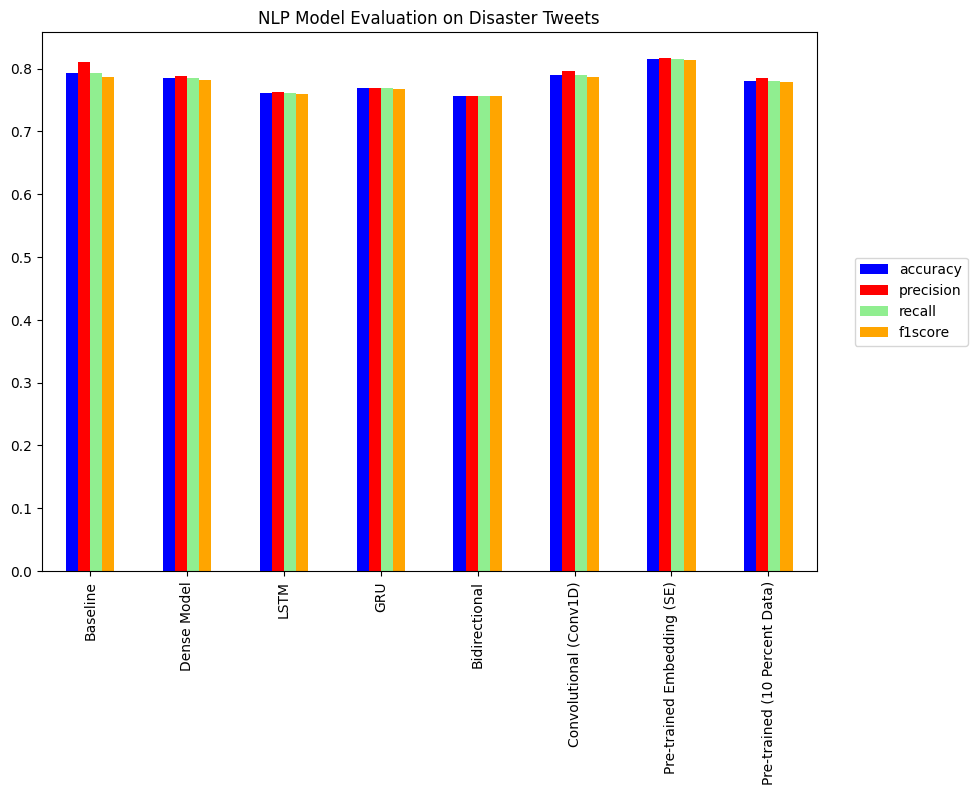

In [112]:
# Plot all the results achieved by different models
figure = all_models_results.plot(kind="bar",
                                 figsize=(10, 7),
                                 color=["blue", "red", "lightgreen", "orange"])

figure.set_title("NLP Model Evaluation on Disaster Tweets")

figure.legend(bbox_to_anchor=(1.04, 0.5),
              loc="center left",
              labels=all_models_results.columns)

Text(0, 0.5, 'F1-Score')

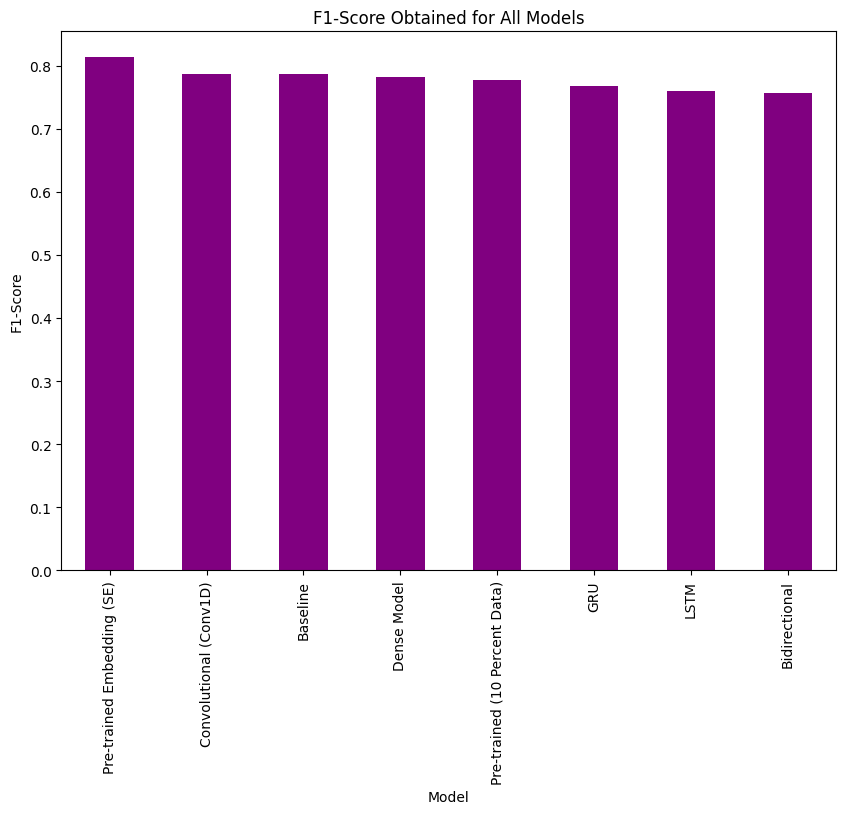

In [123]:
# Sort and compare model results by f1-score
ax = all_models_results.sort_values("f1score", ascending=False)["f1score"].plot(kind="bar",
                                                                                figsize=(10, 7),
                                                                                color="purple");
ax.set_title("F1-Score Obtained for All Models")
ax.set_xlabel("Model")
ax.set_ylabel("F1-Score")

We could previously visualize all of our model's training logs using **TensorBoard.dev** (has been shut down as of January 1, 2024).

In [106]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "NLP modelling experiments" \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # exits the uploader when upload has finished

In [107]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

### Model Combining / Stacking

Combining models, often referred to as model stacking or ensemble learning, is a strategy used to boost performance and robustness in machine learning by leveraging the strengths of multiple models instead of relying on just one.

#### 🎯 Purpose Behind Model Stacking

- **Improved Accuracy:** Different models may capture different patterns. Combining their predictions usually leads to higher overall performance.

- **Reduced Overfitting:** If individual models overfit in different ways, their combination can smooth out the noise.

- **Better Generalization:** Stacked models often generalize better to unseen data.

- **Diverse Perspectives:** Some models might perform well on specific parts of the data; stacking allows combining these strengths.

There are a few of ways we can combine our models:

| **Technique** | **Description**                                                        | **Example Algorithms**                 |
| ------------- | ---------------------------------------------------------------------- | -------------------------------------- |
| **Bagging**   | Trains models in parallel on different data subsets. Reduces variance. | Random Forest                          |
| **Boosting**  | Trains models sequentially; each corrects the previous. Reduces bias.  | AdaBoost, Gradient Boosting, XGBoost   |
| **Stacking**  | Combines predictions of multiple models using a meta-learner.          | Any combination (e.g., CNN + SVM + LR) |


Other Ensemble Techniques:

| **Variant**                  | **Explanation**                                                                  |
| ---------------------------- | -------------------------------------------------------------------------------- |
| **Voting Ensemble**          | Averages or takes the majority of predictions (hard or soft voting).             |
| **Bayesian Model Averaging** | Combines models by weighing them according to Bayesian posterior probabilities.  |


What we do here is combine the 3 models including **Baseline** (Model 0), **Dense Model** (Model 1), and **USE** (Model 6).

In [125]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model1_pred_probs, axis=1) + tf.squeeze(model6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0.], dtype=float32)>

In [126]:
# Calculate results from averaging the prediction probabilities
ensemble_results = compute_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 80.97112860892388,
 'precision': 0.8095108079656885,
 'recall': 0.8097112860892388,
 'f1score': 0.8095422699279908}

In [149]:
# Add our combined model's results to the results DataFrame
all_models_results.loc["Ensemble Results"] = ensemble_results

In [150]:
# Convert the accuracy to the same scale as the rest of the results
all_models_results.loc["Ensemble Results"]["accuracy"] = all_models_results.loc["Ensemble Results"]["accuracy"]/100

<ipython-input-150-843eddf69e7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_models_results.loc["Ensemble Results"]["accuracy"] = all_models_results.loc["Ensemble Results"]["accuracy"]/100


In [152]:
all_models_results

# To remove a row, use the line below
# all_models_results.drop("ensemble_results", axis='index' )

,accuracy,precision,recall,f1score
Baseline,79.265092,0.811139,0.792651,0.786219
Dense Model,78.477690,0.788025,0.784777,0.782314
LSTM,76.115486,0.761888,0.761155,0.759376
GRU,76.902887,0.769011,0.769029,0.767966
Bidirectional,75.590551,0.755906,0.755906,0.755906
Convolutional (Conv1D),79.002625,0.795510,0.790026,0.786927
Pre-trained Embedding (SE),81.496063,0.817255,0.814961,0.813436
Pre-trained (10 Percent Data),78.083990,0.784870,0.780840,0.777979
Ensemble Results,80.971129,0.809511,0.809711,0.809542
